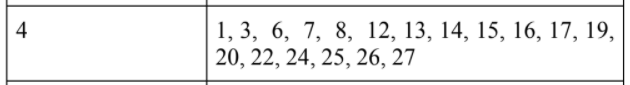

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("D:\DATAFRAME\D.csv") 
df = pd.DataFrame(df)
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [2]:
#1
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [3]:
#3
df.columns


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [4]:
#6
df.groupby(['Gender'])['Name'].nunique()




Gender
F    64911
M    39199
Name: Name, dtype: int64

In [7]:
#7
df[(df['Year'] == 2010)&(df['Gender'] == 'M')].head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [23]:
#8
print("Самое популярное имя ",df[temp == df['Count']]['Name'].values[0], " в ", df[temp == df['Count']]['Year'].values[0])


Самое популярное имя  Linda  в  1947


In [10]:
temp = df['Count'].unique().max()
temp

99680

In [6]:
#12
temp = df[(df['Year'] == 2008)]['Count'].max()
df[df['Count'] == temp]

,Id,Name,Year,Gender,Count
1608302,1608303,Jacob,2008,M,22568


In [36]:
#13
temp = df[(df['Name'] == 'Jacob')&(df['Gender']=='F')]['Count'].max()
df[(df['Count'] == temp) & (df['Name'] == 'Jacob')]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [57]:
#14
temp = df.groupby(['Year'])['Name'].count()-df.groupby(['Year'])['Name'].nunique()
pd.DataFrame(temp[temp == temp.max()])

,Name
Year,
2008,2557


In [73]:
#15
df.groupby(['Year'])[['Count']].sum()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


In [9]:
#16
temp = df.groupby(['Year'])[['Count']].sum()
temp[temp['Count']==max(temp['Count'])].index[0]

1957

In [21]:
#17
df.groupby(['Year','Gender'])[['Count']].sum().unstack().head(5)

Count        
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445

In [35]:
#Задание 18
n=df.groupby(['Year','Gender'])[['Count']].sum().unstack()
sum(n['Count'].F>n['Count'].M)

54

In [40]:
#20
temp = df.groupby(['Name','Gender'])[['Year']].count().unstack()
temp[(temp['Year'].F.notnull())&(temp['Year'].M.notnull())].count()[0]

64911

In [58]:
#22
print("Спостереження проводилось ",df['Year'].max()-df['Year'].min()+1, " років")

Спостереження проводилось  135  років


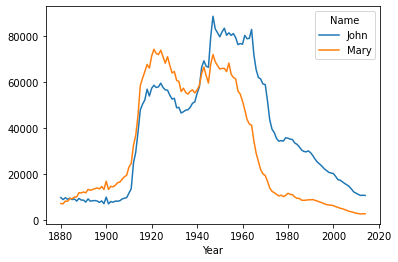

In [86]:
#25
temp = df.groupby(['Year','Name'])[['Count']].sum().unstack()
a = temp['Count'].John.plot()
b = temp['Count'].Mary.plot()
b.legend(title = 'Name')

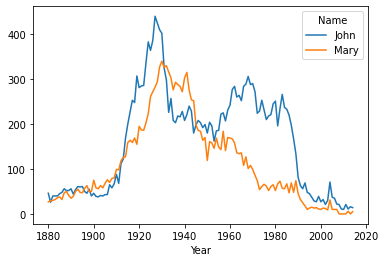

In [91]:
#26
temp=df.groupby(['Year','Name','Gender'])[['Count']].sum().unstack()
temp['Count'].F.groupby(['Year','Name']).sum().unstack().John.plot()
b=temp['Count'].M.groupby(['Year','Name']).sum().unstack().Mary.plot().legend(title = 'Name')

In [102]:
#27
df.sort_values(by='Count',ascending=False).groupby(['Year']).agg({'Name':'first','Count':'first'})

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
